In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import matplotlib.dates as mdates
from matplotlib import cm
%matplotlib inline

/home/ryohayama/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
raw_data = pd.read_csv('./raw_data.csv')

data = raw_data.copy()
var_list = data.columns[2:]
for var in var_list:
    data.loc[:, var] = data.loc[:, var].str.strip("%").astype(float)

data.loc[:, 'observation_date'] = pd.to_datetime(data.loc[:, 'observation_date'], format="%Y-%m-%d")

In [4]:
data.to_csv('./processed_data.csv', index=False)

In [5]:
data = data.set_index('observation_date')

In [66]:
data.head(10)

,CPIAUCNS,GS10,GS5,GS30,GS2,GS1M,GS20,GS3M,GS3,FII5,...,GS2_log1,GS1M_log1,GS20_log1,GS3M_log1,GS3_log1,FII5_log1,GS7_log1,FII30_log1,GS1_log1,GS5-FII5_log1
observation_date,,,,,,,,,,,,,,,,,,,,,
1953-04-01,26.6,2.83,2.62,NaN,NaN,NaN,3.08,NaN,2.51,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953-05-01,26.7,3.05,2.87,NaN,NaN,NaN,3.18,NaN,2.72,NaN,...,NaN,NaN,0.013876,NaN,0.034895,NaN,NaN,NaN,0.021540,NaN
1953-06-01,26.8,3.11,2.94,NaN,NaN,NaN,3.21,NaN,2.74,NaN,...,NaN,NaN,0.004078,NaN,0.003182,NaN,NaN,NaN,-0.005286,NaN
1953-07-01,26.8,2.93,2.75,NaN,NaN,NaN,3.12,NaN,2.62,NaN,...,NaN,NaN,-0.012350,NaN,-0.019449,NaN,NaN,NaN,-0.012589,NaN
1953-08-01,26.9,2.95,2.80,NaN,NaN,NaN,3.10,NaN,2.58,NaN,...,NaN,NaN,-0.002793,NaN,-0.006682,NaN,NaN,NaN,-0.018642,NaN
1953-09-01,26.9,2.87,2.71,NaN,NaN,NaN,3.07,NaN,2.56,NaN,...,NaN,NaN,-0.004223,NaN,-0.003380,NaN,NaN,NaN,-0.015512,NaN
1953-10-01,27.0,2.66,2.43,NaN,NaN,NaN,2.95,NaN,2.23,NaN,...,NaN,NaN,-0.017316,NaN,-0.059935,NaN,NaN,NaN,-0.089570,NaN
1953-11-01,26.9,2.68,2.42,NaN,NaN,NaN,2.95,NaN,2.20,NaN,...,NaN,NaN,0.000000,NaN,-0.005882,NaN,NaN,NaN,-0.030137,NaN
1953-12-01,26.9,2.59,2.32,NaN,NaN,NaN,2.89,NaN,2.07,NaN,...,NaN,NaN,-0.008924,NaN,-0.026452,NaN,NaN,NaN,-0.002608,NaN


In [6]:
var_list

Index(['GS10', 'GS5', 'GS30', 'GS2', 'GS1M', 'GS20', 'GS3M', 'GS3', 'FII5',
       'GS7', 'FII30', 'GS1', 'GS5-FII5'],
      dtype='object')

In [7]:
len(var_list)

13

In [8]:
print('   Total - %d Rows' % (len(data)))
for i, var in enumerate(var_list):
    num_nan = len(data[data[var].isnull()])
    print('%8s - %3d missing' % (var, num_nan))

   Total - 775 Rows
    GS10 -   0 missing
     GS5 -   0 missing
    GS30 - 333 missing
     GS2 - 278 missing
    GS1M - 579 missing
    GS20 -  81 missing
    GS3M - 345 missing
     GS3 -   0 missing
    FII5 - 597 missing
     GS7 - 195 missing
   FII30 - 682 missing
     GS1 -   0 missing
GS5-FII5 - 597 missing


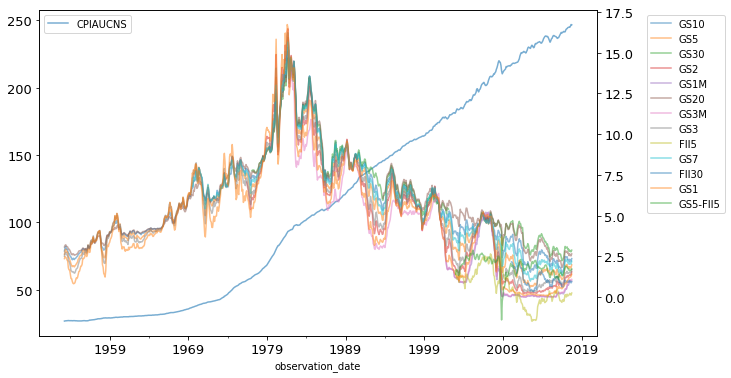

In [9]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

data.iloc[:, 0].plot(ax=ax1, alpha=0.6)
data.iloc[:, 1:].plot(ax=ax2, alpha=0.5)
ax1.legend()
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

In [10]:
orignal_cols = ['CPIAUCNS', 'GS10', 'GS5', 'GS30', 'GS2', 'GS1M', 'GS20', 'GS3M', 'GS3', 'FII5',
       'GS7', 'FII30', 'GS1', 'GS5-FII5']

In [11]:
orignal_cols

['CPIAUCNS',
 'GS10',
 'GS5',
 'GS30',
 'GS2',
 'GS1M',
 'GS20',
 'GS3M',
 'GS3',
 'FII5',
 'GS7',
 'FII30',
 'GS1',
 'GS5-FII5']

# Plotting deltas

In [12]:
for i, col in enumerate(orignal_cols):
    label = col + '_delta1'
    data[label] = data[col] - data[col].shift(1)

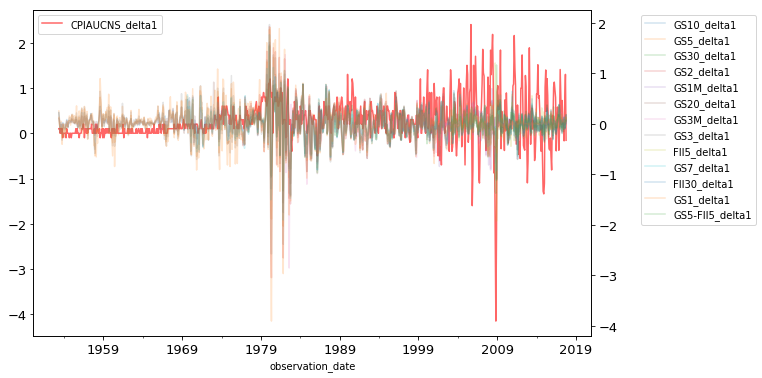

In [13]:
delta1_cols = [col for col in data.columns if '_delta1' in col]
delta1s = data[delta1_cols]

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

delta1s.iloc[:, 0].plot(ax=ax1, alpha=0.6, color='r')
delta1s.iloc[:, 1:].plot(ax=ax2, alpha=0.2)
ax1.legend()
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

## Pearson Correlation

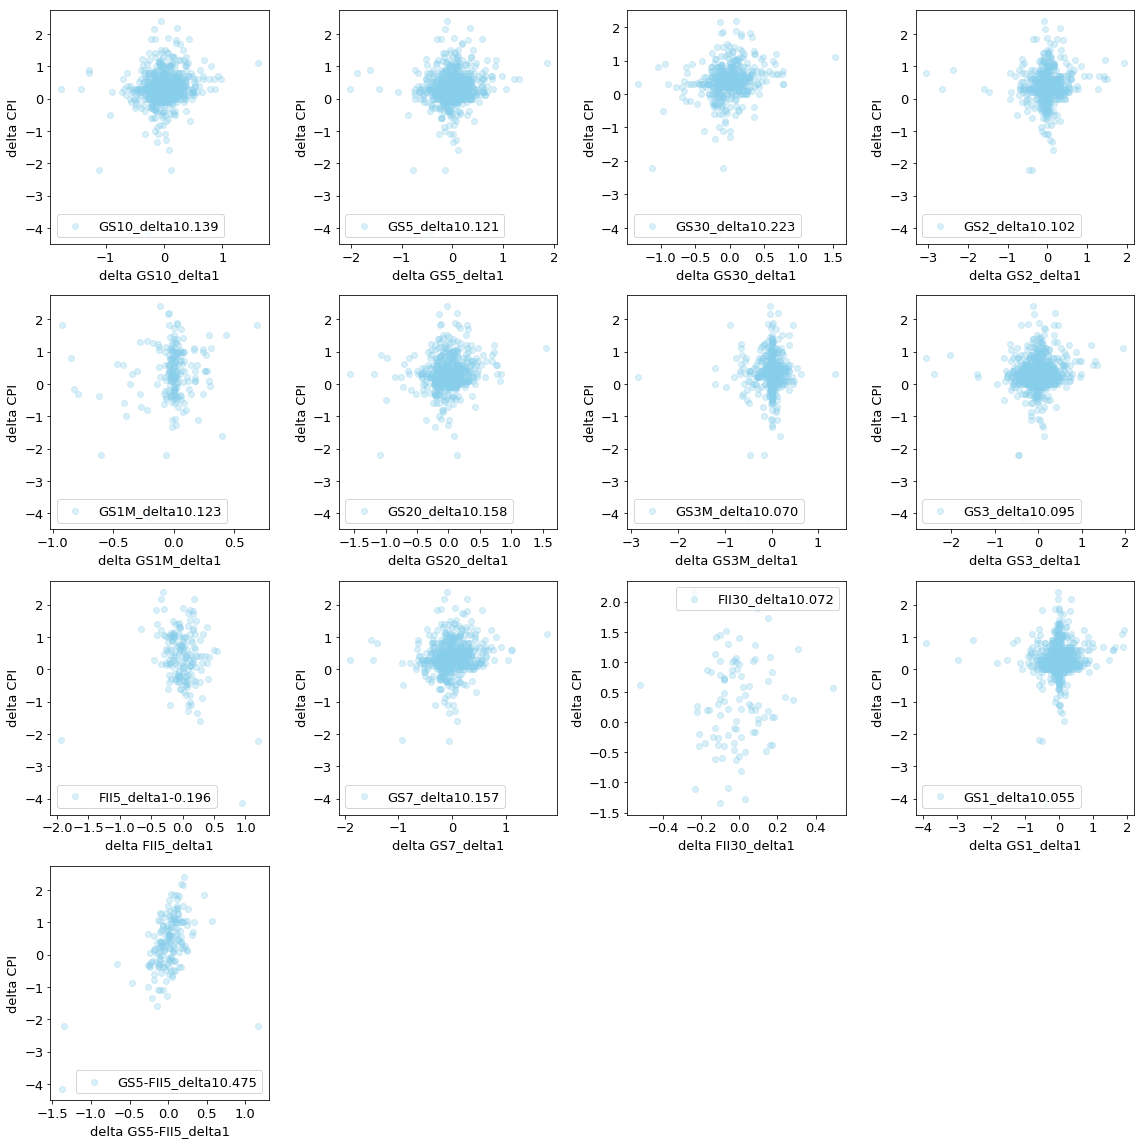

In [14]:
delta1_cols = [col for col in data.columns if '_delta1' in col]
delta1s = data[delta1_cols]
delta_corrs = {}

fig = plt.figure(figsize=(16, 16))

for i, col in enumerate(delta1_cols[1:]):
    x = delta1s[col]
    y = delta1s.iloc[:, 0]
    corr = x.corr(y)
    delta_corrs[col] = corr
    
    ax = fig.add_subplot(4, 4, i+1)
    label = col + ('%.3f' % corr)
    ax.scatter(x, y, color='skyblue', alpha=0.3, label=label)
    ax.set_xlabel('delta %s' % col, fontsize=13)
    ax.set_ylabel('delta CPI', fontsize=13)
    ax.legend(fontsize=13)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(13)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(13)
    
plt.tight_layout()

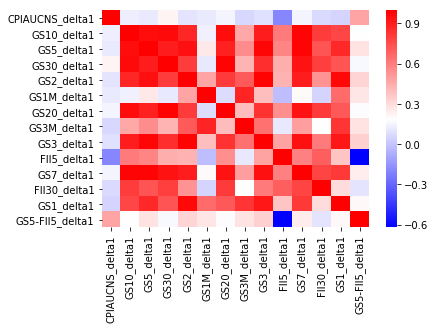

In [15]:
sns.heatmap(delta1s.corr(), cmap=cm.bwr)

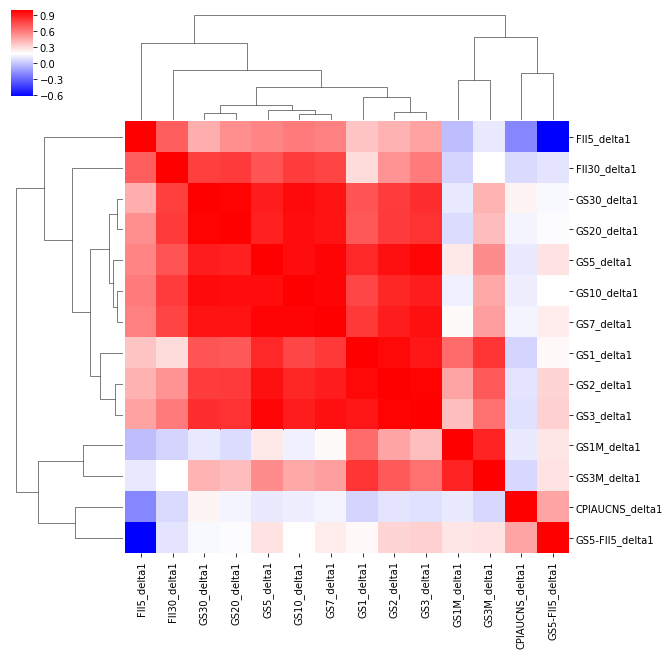

In [16]:
sns.clustermap(delta1s.corr(), cmap=cm.bwr)

In [17]:
pd.Series(delta_corrs).to_frame(name='Pearson_Correlation')

,Pearson_Correlation
FII30_delta1,0.071667
FII5_delta1,-0.195658
GS10_delta1,0.138835
GS1M_delta1,0.122859
GS1_delta1,0.054638
GS20_delta1,0.158372
GS2_delta1,0.101588
GS30_delta1,0.223197
GS3M_delta1,0.069674
GS3_delta1,0.095007


# Plotting logs

In [18]:
for i, col in enumerate(orignal_cols):
    label = col + '_log1'
    data[label] = data[col]/data[col].shift(1)
    data[label] = data[label].apply(np.log10)

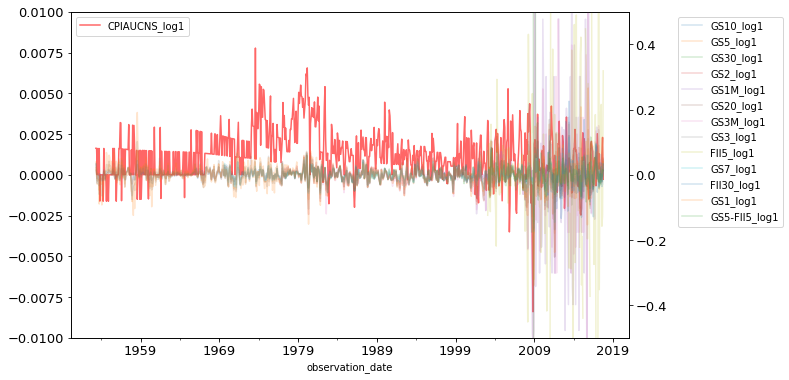

In [19]:
log1_cols = [col for col in data.columns if '_log1' in col]
log1s = data[log1_cols]

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

log1s.iloc[:, 0].plot(ax=ax1, alpha=0.6, color='r')
log1s.iloc[:, 1:].plot(ax=ax2, alpha=0.2)

ax1.set_ylim([-0.01, 0.01])
ax2.set_ylim([-0.5, 0.5])

ax1.legend(loc='upper left')
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

## Pearson Correlation

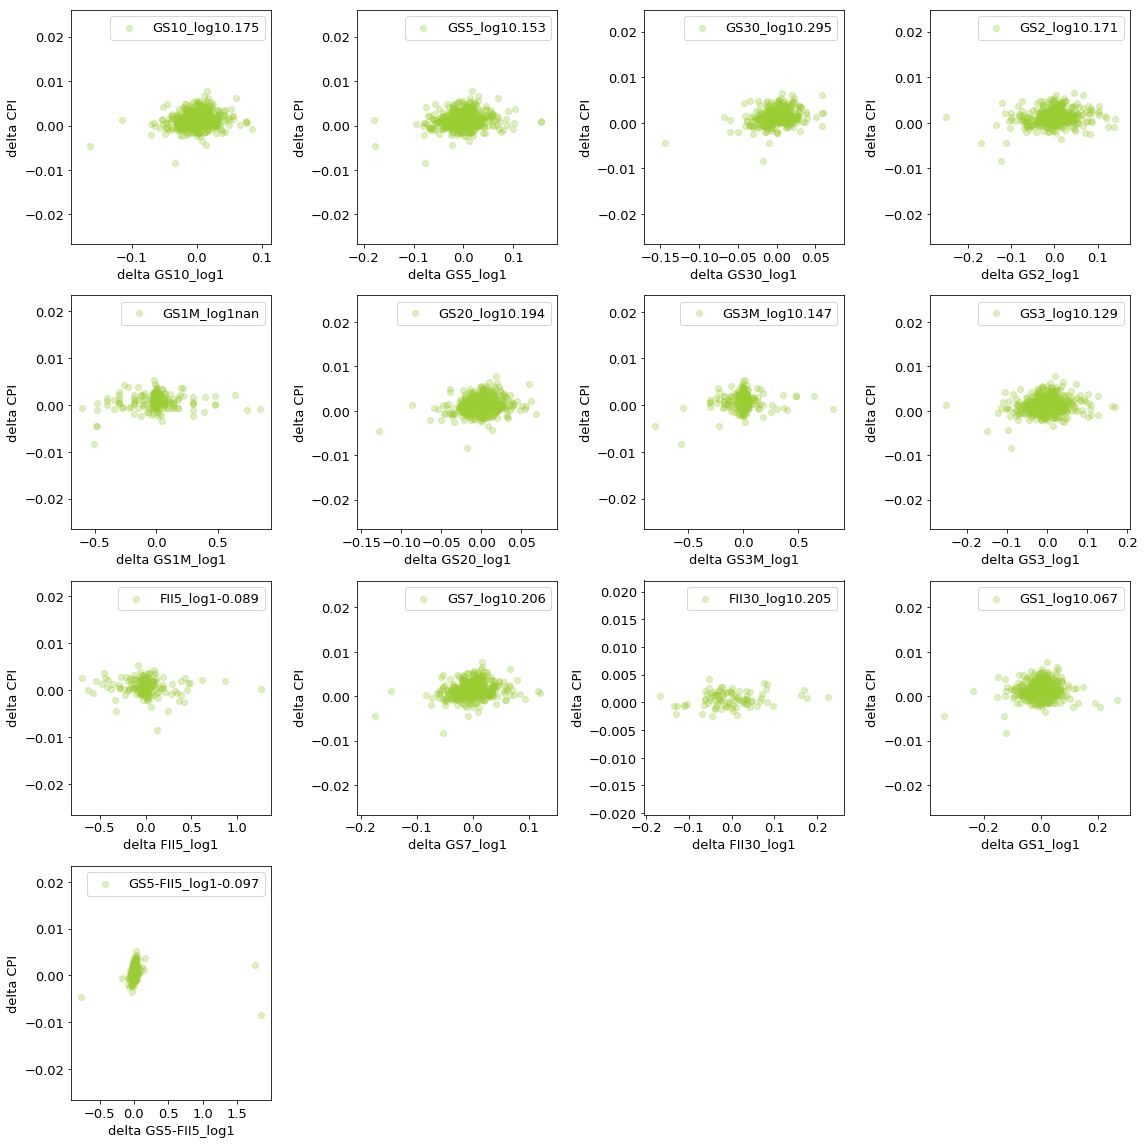

In [20]:
fig = plt.figure(figsize=(16, 16))
log_corrs = {}

for i, col in enumerate(log1_cols[1:]):
    x = log1s[col]
    y = log1s.iloc[:, 0]
    corr = x.corr(y)
    log_corrs[col] = corr
    
    ax = fig.add_subplot(4, 4, i+1)
    label = col + ('%.3f' % corr)
    ax.scatter(x, y, color='yellowgreen', alpha=0.3, label=label)
    ax.set_xlabel('delta %s' % col, fontsize=13)
    ax.set_ylabel('delta CPI', fontsize=13)
    ax.legend(fontsize=13)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(13)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(13)
    
plt.tight_layout()

In [21]:
pd.Series(log_corrs).to_frame(name='Pearson_Correlation')

,Pearson_Correlation
FII30_log1,0.204712
FII5_log1,-0.088763
GS10_log1,0.175498
GS1M_log1,NaN
GS1_log1,0.066813
GS20_log1,0.194390
GS2_log1,0.170989
GS30_log1,0.294815
GS3M_log1,0.146999
GS3_log1,0.129258


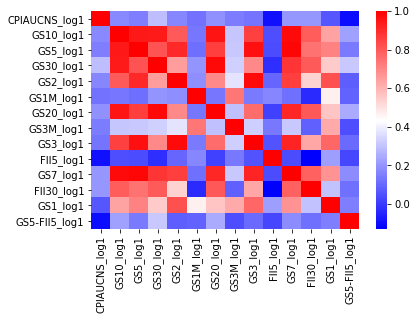

In [22]:
sns.heatmap(log1s.corr(), cmap=cm.bwr)

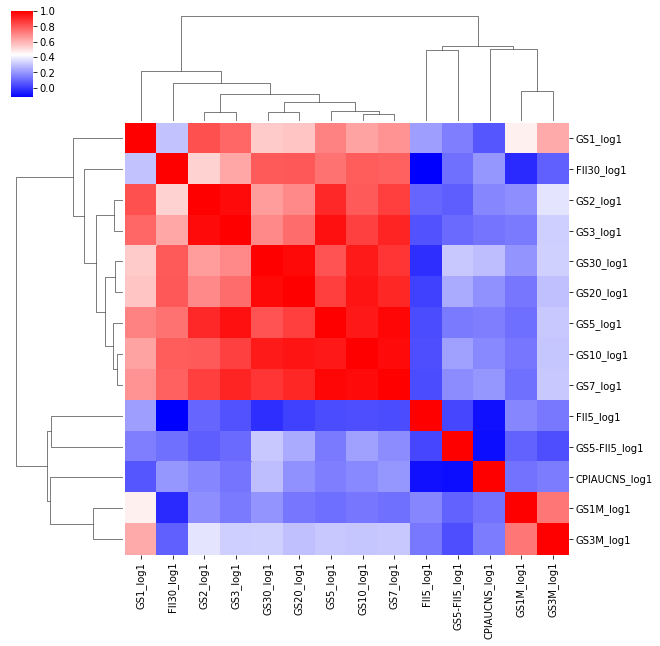

In [23]:
sns.clustermap(log1s.corr(), cmap=cm.bwr)

# RFC

In [24]:
delta1s.head()

,CPIAUCNS_delta1,GS10_delta1,GS5_delta1,GS30_delta1,GS2_delta1,GS1M_delta1,GS20_delta1,GS3M_delta1,GS3_delta1,FII5_delta1,GS7_delta1,FII30_delta1,GS1_delta1,GS5-FII5_delta1
observation_date,,,,,,,,,,,,,,
1953-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953-05-01,0.1,0.22,0.25,NaN,NaN,NaN,0.10,NaN,0.21,NaN,NaN,NaN,0.12,NaN
1953-06-01,0.1,0.06,0.07,NaN,NaN,NaN,0.03,NaN,0.02,NaN,NaN,NaN,-0.03,NaN
1953-07-01,0.0,-0.18,-0.19,NaN,NaN,NaN,-0.09,NaN,-0.12,NaN,NaN,NaN,-0.07,NaN
1953-08-01,0.1,0.02,0.05,NaN,NaN,NaN,-0.02,NaN,-0.04,NaN,NaN,NaN,-0.10,NaN


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [26]:
delta1s.iloc[:, 1:].columns

Index(['GS10_delta1', 'GS5_delta1', 'GS30_delta1', 'GS2_delta1', 'GS1M_delta1',
       'GS20_delta1', 'GS3M_delta1', 'GS3_delta1', 'FII5_delta1', 'GS7_delta1',
       'FII30_delta1', 'GS1_delta1', 'GS5-FII5_delta1'],
      dtype='object')

In [27]:
X = np.array(delta1s.iloc[:, 1:])
y = np.array(delta1s.iloc[:, 0]).reshape(-1, 1)

In [28]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_imp = imp.fit_transform(X)

In [29]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
y_imp = imp.fit_transform(y).ravel()

In [30]:
X_imp.shape, y.shape

((775, 13), (775, 1))

In [31]:
cutoff = 630
X_train = X_imp[:cutoff, :]
X_test = X_imp[cutoff:, :]
y_train = y_imp[:cutoff]
y_test = y_imp[cutoff:]

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630, 13), (145, 13), (630,), (145,))

In [33]:
rgr = RandomForestRegressor(n_estimators=200, n_jobs=8)
rgr.fit(X_train, y_train)
y_pred_train = rgr.predict(X_train)
y_pred_test = rgr.predict(X_test)

In [34]:
score = r2_score(y_test, y_pred_test)
print('R2 Score = %.3f' % score)

R2 Score = 0.060


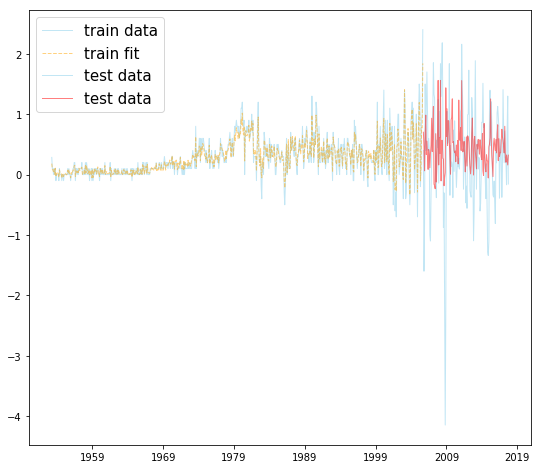

In [35]:
plt.figure(figsize=(9, 8))
plt.plot(delta1s.index[:cutoff].date, y_train, color='skyblue', lw=1, alpha=0.5, label='train data')
plt.plot(delta1s.index[:cutoff].date, y_pred_train, color='orange', ls='--', lw=1, alpha=0.5, label='train fit')
plt.plot(delta1s.index[cutoff:].date, y_test, color='skyblue', lw=1, alpha=0.5, label='test data')
plt.plot(delta1s.index[cutoff:].date, y_pred_test, color='red', lw=1, alpha=0.5, label='test data')
plt.legend(fontsize=15)

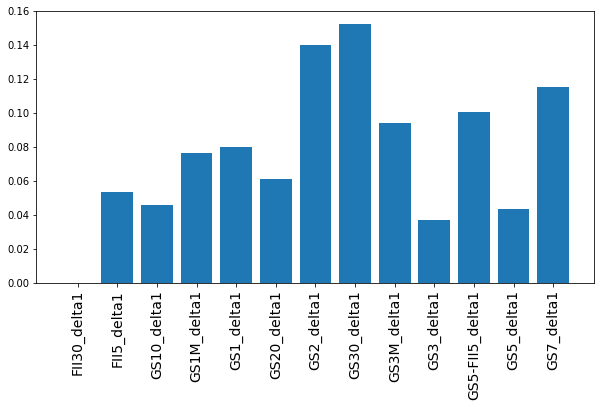

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(list(delta1s.iloc[:, 1:].columns), rgr.feature_importances_)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(14)

In [37]:
cpi_train = []
cpi_test = []
cpi_pred_train = []
cpi_pred_test = []

for i in range(X_train.shape[0]):
    cpi_train.append(np.sum(y_train[:i]))
    cpi_pred_train.append(np.sum(y_pred_train[:i]))
for i in range(X_test.shape[0]):
    cpi_test.append(np.sum(y_test[:i]))
    cpi_pred_test.append(np.sum(y_pred_test[:i]))
cpi_test = np.array(cpi_test) + cpi_train[-1]
cpi_pred_test = np.array(cpi_pred_test) + cpi_pred_train[-1]

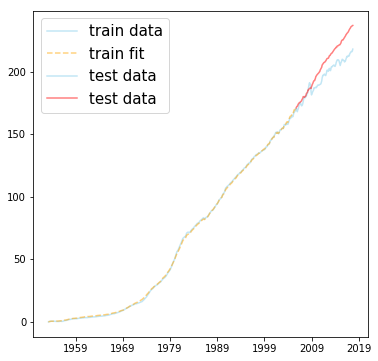

In [38]:
plt.figure(figsize=(6, 6))
plt.plot(delta1s.index[:cutoff].date, cpi_train, color='skyblue', alpha=0.5, label='train data')
plt.plot(delta1s.index[:cutoff].date, cpi_pred_train, color='orange', ls='--', alpha=0.5, label='train fit')
plt.plot(delta1s.index[cutoff:].date, cpi_test, color='skyblue', alpha=0.5, label='test data')
plt.plot(delta1s.index[cutoff:].date, cpi_pred_test, color='red', alpha=0.5, label='test data')
plt.legend(fontsize=15)

In [39]:
cutoffs = np.linspace(400, 720).astype(int)
scores = []

for cutoff in cutoffs:
    
    X_train = X_imp[:cutoff, :]
    X_test = X_imp[cutoff:, :]
    y_train = y_imp[:cutoff]
    y_test = y_imp[cutoff:]

    rgr = RandomForestRegressor(n_estimators=200, n_jobs=8)
    rgr.fit(X_train, y_train)
    y_pred_train = rgr.predict(X_train)
    y_pred_test = rgr.predict(X_test)

    scores.append(r2_score(y_test, y_pred_test))

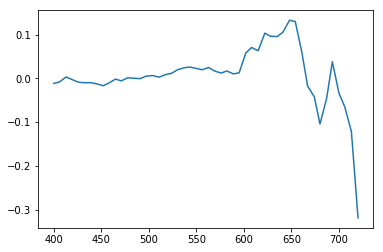

In [40]:
plt.plot(cutoffs, scores)

In [70]:
regular_list = [col for col in data.columns
                if '_delta' not in col
                if '_log' not in col]

In [71]:
regular_list

['CPIAUCNS',
 'GS10',
 'GS5',
 'GS30',
 'GS2',
 'GS1M',
 'GS20',
 'GS3M',
 'GS3',
 'FII5',
 'GS7',
 'FII30',
 'GS1',
 'GS5-FII5']

In [42]:
post1980 = data[data.index.year >= 1980]

In [43]:
post1980.head()

,CPIAUCNS,GS10,GS5,GS30,GS2,GS1M,GS20,GS3M,GS3,FII5,...,GS2_log1,GS1M_log1,GS20_log1,GS3M_log1,GS3_log1,FII5_log1,GS7_log1,FII30_log1,GS1_log1,GS5-FII5_log1
observation_date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,77.8,10.80,10.74,10.60,11.50,NaN,10.65,NaN,10.88,NaN,...,0.004174,NaN,0.019602,NaN,0.006839,NaN,0.014348,NaN,0.002890,NaN
1980-02-01,78.9,12.41,12.60,12.13,13.42,NaN,12.21,NaN,12.84,NaN,...,0.067055,NaN,0.059366,NaN,0.071936,NaN,0.065735,NaN,0.062292,NaN
1980-03-01,80.1,12.75,13.47,12.34,14.88,NaN,12.49,NaN,14.05,NaN,...,0.044850,NaN,0.009847,NaN,0.039111,NaN,0.015992,NaN,0.055567,NaN
1980-04-01,81.0,11.47,11.84,11.40,12.50,NaN,11.42,NaN,12.02,NaN,...,-0.075693,NaN,-0.038896,NaN,-0.067772,NaN,-0.053623,NaN,-0.075355,NaN
1980-05-01,81.8,10.18,9.95,10.36,9.45,NaN,10.44,NaN,9.44,NaN,...,-0.121478,NaN,-0.038966,NaN,-0.104932,NaN,-0.056429,NaN,-0.151186,NaN


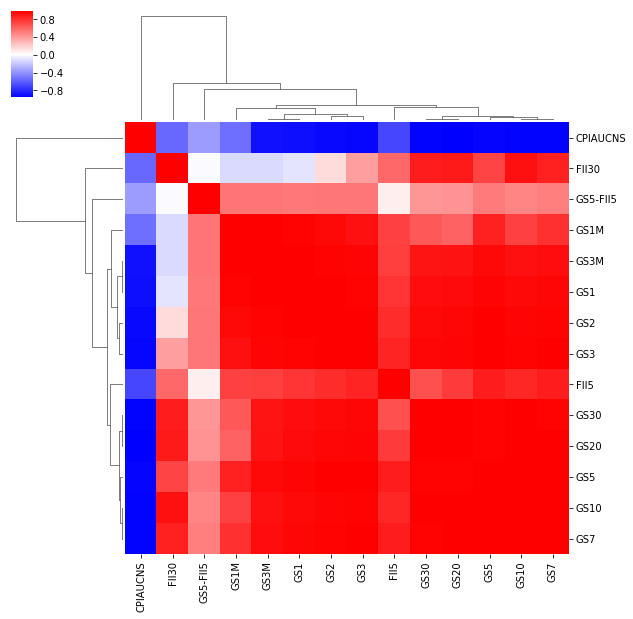

In [72]:
sns.clustermap(post1980[regular_list].corr(), cmap=cm.bwr)

/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


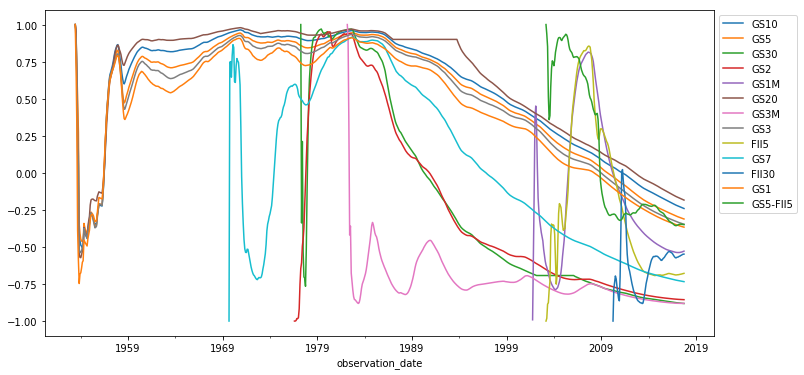

In [60]:
df = pd.DataFrame(index=data.index[1:])

cpi = data.iloc[:, 0]
for var in var_list:
    d = data.loc[:, var]
    for i in range(1, len(data)):
        corr = (cpi.iloc[:i]).corr((d.iloc[:i]))
        df.loc[data.index[i], var] = corr

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df.plot(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


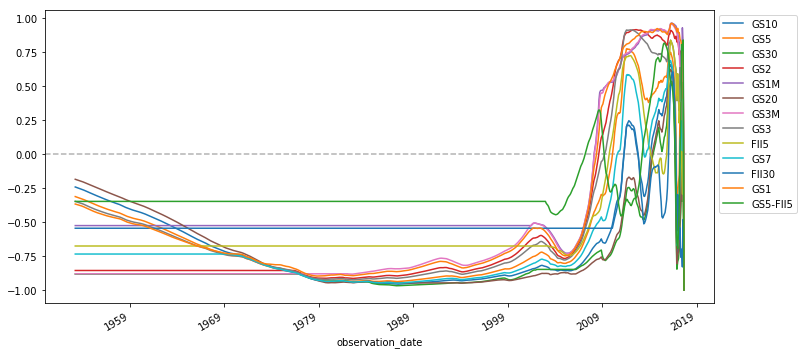

In [87]:
df = pd.DataFrame(index=data.index[1:])

cpi = data.iloc[:, 0]
for var in var_list:
    d = data.loc[:, var]
    for i in range(len(data)):
        corr = (cpi.iloc[i:]).corr((d.iloc[i:]))
        df.loc[data.index[i], var] = corr

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.axhline(y=0, ls='--', color='0.7')
df.plot(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

In [96]:
post2012 = data[(data.index.year >= 2012)]

In [97]:
post2012[regular_list].head()

,CPIAUCNS,GS10,GS5,GS30,GS2,GS1M,GS20,GS3M,GS3,FII5,GS7,FII30,GS1,GS5-FII5
observation_date,,,,,,,,,,,,,,
2012-01-01,226.665,1.97,0.84,3.03,0.24,0.02,2.70,0.03,0.36,-0.92,1.38,0.74,0.12,1.76
2012-02-01,227.663,1.97,0.83,3.11,0.28,0.06,2.75,0.09,0.38,-1.11,1.37,0.72,0.16,1.94
2012-03-01,229.392,2.17,1.02,3.28,0.34,0.06,2.94,0.08,0.51,-1.03,1.56,0.87,0.19,2.05
2012-04-01,230.085,2.05,0.89,3.18,0.29,0.07,2.82,0.08,0.43,-1.06,1.43,0.79,0.18,1.95
2012-05-01,229.815,1.80,0.76,2.93,0.29,0.07,2.53,0.09,0.39,-1.12,1.21,0.68,0.19,1.88


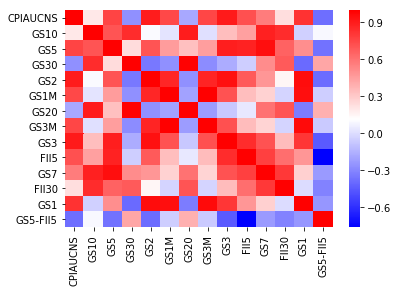

In [98]:
sns.heatmap(post2012[regular_list].corr(), cmap=cm.bwr)

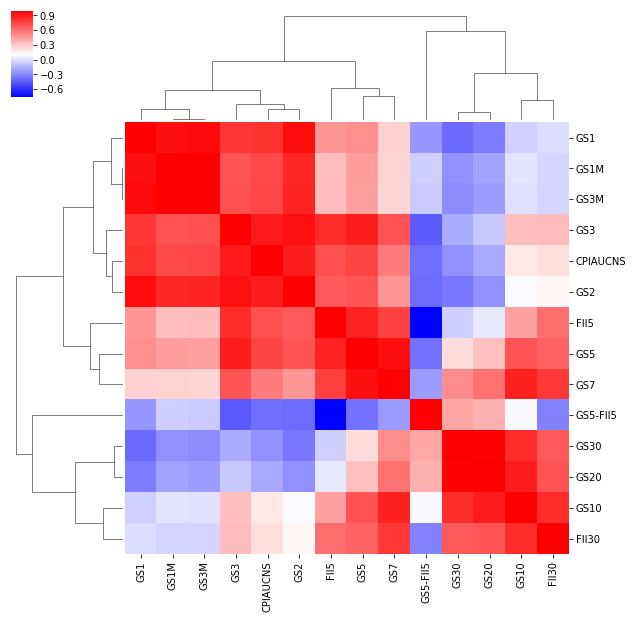

In [99]:
sns.clustermap(post2012[regular_list].corr(), cmap=cm.bwr)

/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


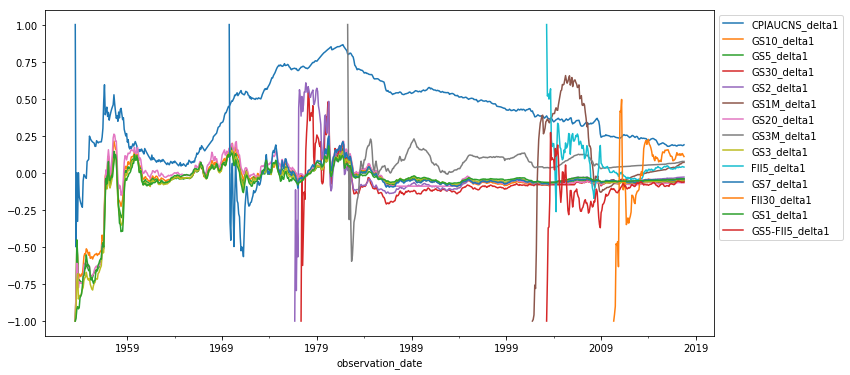

In [101]:
df = pd.DataFrame(index=data.index[1:])

cpi = data.iloc[:, 0]
for var in delta1_cols:
    d = data.loc[:, var]
    for i in range(1, len(data)):
        corr = (cpi.iloc[:i]).corr((d.iloc[:i]))
        df.loc[data.index[i], var] = corr

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df.plot(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


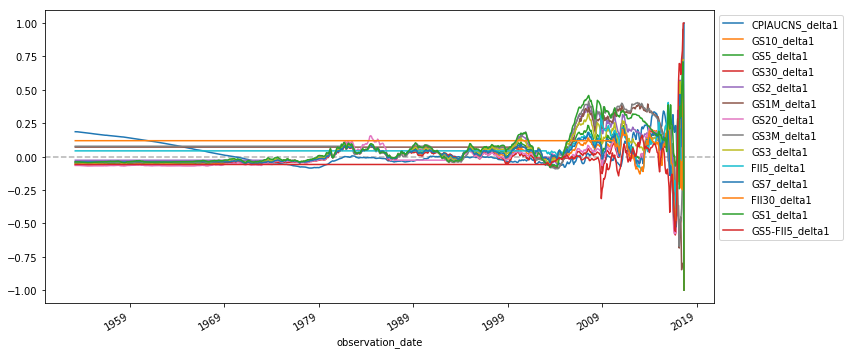

In [100]:
df = pd.DataFrame(index=data.index[1:])

cpi = data.iloc[:, 0]
for var in delta1_cols:
    d = data.loc[:, var]
    for i in range(len(data)):
        corr = (cpi.iloc[i:]).corr((d.iloc[i:]))
        df.loc[data.index[i], var] = corr

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.axhline(y=0, ls='--', color='0.7')
df.plot(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)